<a href="https://colab.research.google.com/github/tranhuuan170302/source_code_model_and_statistical/blob/main/handle_statistical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import pandas as pd
import string 
import re
import time
import nltk
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

import math
sns.set()

# Overview data source

In [2]:
df = pd.read_csv('/content/drive/MyDrive/indeed/resultData.csv')

In [3]:
# show top 5 data is head
df.head()

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,Company Description\nSmartDev is a leading pro...,.NET Developer\n
1,1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,Overview:\nHow would you like to join an inter...,.NET Developer\n
2,2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,Sioux Group was founded in 1996 in the Netherl...,.NET Developer\n
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,"Up to $2,200\nJunior, Middle, Senior\nDa Nang\...",.NET Developer\n
4,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,"Web Developer (.NET, ASP.NET, C#)\nNPV Corp\nỨ...",.NET Developer\n


In [4]:
# drop column 'Unnamed'
df.drop(columns='Unnamed: 0', inplace = True)

In [5]:
# show infomaion data
def overView(x):
    listSummary = []
    for i in x.columns:
        row = x[i].shape[0]
        missingVal = x[i].isna().sum()
        unique = len(x[i].unique())
        typeCol = str(x[i].dtype)
        percentageMissingVal = x[i].isna().sum()/x.shape[0]*100
        listSummary.append([i, row,typeCol,unique, missingVal, percentageMissingVal])
    return pd.DataFrame(listSummary, columns = ['Name Columns', 'Total row', 'type col', 'Total unique', 'Total miss val', 'percentage missing value'])

In [6]:
# show information databases
overView(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,JobTitle,4379,object,2220,0,0.0
1,Company,4379,object,1114,0,0.0
2,Location,4379,object,39,0,0.0
3,PostDate,4379,object,43,0,0.0
4,ExtractDate,4379,object,2,0,0.0
5,Summary,4379,object,2678,0,0.0
6,JobUrl,4379,object,13,0,0.0


# Process data step-by-step <br>
+ Step 1: Remove special character.<br>
+ Step 2: Using algorithm TF-IDF to look up keyword important in sentence.<br>
+ Step 3: Create list keywords include: keyword skill, keyword tool, keyword degree, keyword level. <br>
+ Step 4: Filter keywords in sentence by look at list keyword to choose.<br>
+ Step 5: Create dataFrame add keyword.<br>
+ Step 6: Visualization data, and hypothesis testing.<br>

In [7]:
# download package
nltk.download('stopwords')
nltk.download('punkt')
# required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Keyword skills, tools, degree, level.

In [8]:
# got these keywords by looking at some examples and using existing knowledge.
tool_keywords = ['.net', 'java', 'azur', 'javascript', 'css3', 'azure', 'amazon', 'python', 'c', 'c++', 'c#', 'linux', 'angularjs', 'regularjs', 'requirejs', 'numpy', 'nuxtjs', 'xlsx',
			'microsoft', 'bootstrap', 'js', 'visual', 'typescript', 'snack', 'abi', 'nodejs', 'html5', 'reactjs', 'redhat', 'reactcharts', 'mongoldb', 'xmlhttprequest',
			'vscode', 'vuejs','melonjs', 'xampp', 'winform', 'wireless', 'wireshark', 'wordpress', 'virtualbox', 'google cloud', 'scala', 'django', 'hadoop', 'haoop', 'zookeep' , 'solr',
			'photoshop', 'php', 'phd', 'relayjs', 'oracle', 'opencv', 'p2p', 'redux', 'referenced', 'pytest', 'matplotlib', 'lavarel', 'nestjs', 'unix', 'git', 'redi',
			'pyspark', 'pytorch', 'protocol', 'sql', 'websocket', 'proptech', 'progresql', 'plsql', 'powerbi', 'powerdesigner', 'lambda', 'nuget', 'untiy3d', 'flutter',
			'tableau', 'scratch', 'scrum', 'scipy', 'scikit', 'simulated', 'screenshot', 'script', 'powerpoint', 'serves', 'excel', 'word', 'waveform', 'docker', 'mariadb', 'markdowns', 'matlab', 'melonjs', 'ngnix', 'ubuntu', 'toolkits']




# hard skills/knowledge required.
skill_keywords = ['refresh', 'probabilities', 'leader', 'portability', 'warehouse', 'maitainance', 'metadata', 'maximization', 'knowledgeable', 'modify', 'navigate',
 'manager', 'metastock', 'metaverse', 'psychology','pipline', 'programing', 'provides', 'prblem solving','predict', 'statistics',
'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'test case', 'tsql', 'databases', 'sql',
 'dashboard', 'geospatial', 'ocr', 'english', 'math', 'econometrics', 'marketing', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory', 'logic', 'multithread',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics', 
 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'csdl', 'report', 'databases', 'sql', 'test',
 'clustering', 'cluster', 'design', 'optimization', 'visualization', 'nlp', 'negotiation', 'network', 'glm', 'uiux', 'teamwork', 'creative thinking',
  'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian', 'mindset', 'threadhandling', 'analytic', 'e-commerc',
  'support', 'teamwork', 'communicated', 'adaptability', 'coding', 'virtualization', 'organization', 'creativity']



degree = ['bs', 'bachelor', 'undergraduate', 'certificate',
               'master', 'graduate', 'mba', 'intermediate',
               'phd', 'ph.d', 'ba', 'ma', 'it',
               'postdoctoral', 'postdoc', 'doctorate']

level = ['junior', 'intership', 'fresher', 'senior', 'middle', 'leader', 'architect', 'manager']

In [9]:
# parts of speech tagging
tagged = nltk.pos_tag(tool_keywords)

In [10]:
print(tagged)

[('.net', 'NN'), ('java', 'NN'), ('azur', 'NN'), ('javascript', 'NN'), ('css3', 'NN'), ('azure', 'NN'), ('amazon', 'NN'), ('python', 'NN'), ('c', 'NN'), ('c++', 'NN'), ('c#', 'NN'), ('linux', 'NN'), ('angularjs', 'NN'), ('regularjs', 'NN'), ('requirejs', 'NN'), ('numpy', 'JJ'), ('nuxtjs', 'JJ'), ('xlsx', 'NN'), ('microsoft', 'JJ'), ('bootstrap', 'NN'), ('js', 'NN'), ('visual', 'JJ'), ('typescript', 'NN'), ('snack', 'NN'), ('abi', 'NN'), ('nodejs', 'JJ'), ('html5', 'NN'), ('reactjs', 'NN'), ('redhat', 'WP'), ('reactcharts', 'VBZ'), ('mongoldb', 'NN'), ('xmlhttprequest', 'JJS'), ('vscode', 'NN'), ('vuejs', 'NN'), ('melonjs', 'NN'), ('xampp', 'NNP'), ('winform', 'NN'), ('wireless', 'NN'), ('wireshark', 'NN'), ('wordpress', 'NN'), ('virtualbox', 'NN'), ('google cloud', 'NN'), ('scala', 'NN'), ('django', 'NN'), ('hadoop', 'NN'), ('haoop', 'NN'), ('zookeep', 'NN'), ('solr', 'NN'), ('photoshop', 'NN'), ('php', 'NN'), ('phd', 'NN'), ('relayjs', 'NN'), ('oracle', 'NN'), ('opencv', 'IN'), ('p2p'

## Step 1: Remove special character.

In [11]:
# create key in row
df = df.reset_index()

In [12]:
# column Summary
df['Summary'] = df['Summary'].apply(lambda x : re.sub(r'(<[^>]+>)|(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)',' ', x))
df['Summary'] = df['Summary'].str.replace('\n', ' ')

# column JobUrl
df['JobUrl'] = df['JobUrl'].str.replace('\n', '')
# column locations
df['Location'] = df['Location'].apply(lambda string: string.replace(string[string.find('+'): len(string)], '') if string.find('+') >0 else string, '')
df['Location'] = df['Location'].str.lower()
df['Location'] = df['Location'].str.replace('\n', '')
df['Location'] = df['Location'].str.replace('ð', 'đ')

In [13]:
df['review'] = df['Summary']
df1 = pd.DataFrame(columns = ['index', 'review'])
# split the text by "."
for idx in df.index.unique():
  string = df['Summary'][idx]
  string = string.split('.')
  id = []
  txt = []
  
  for st in string:
    id.append(idx)
    txt.append(st)
    datax = pd.DataFrame(list(zip(id, txt)), columns = ['index', 'review'])
  df1 = pd.concat([df1, datax])

In [14]:
df1.rename(columns= {'review': 'sentence_review'}, inplace=True)

In [15]:
# merger data by index
df = df.merge(df1, left_on = 'index', right_on = 'index')

In [16]:
# remove data is duplicated
df = df.loc[df.duplicated() == False, :]

## Filter keywords in sentences

In [17]:
keywords = tool_keywords + skill_keywords + degree + level

In [18]:
keywords[:10]

['.net',
 'java',
 'azur',
 'javascript',
 'css3',
 'azure',
 'amazon',
 'python',
 'c',
 'c++']

In [19]:

ps = PorterStemmer()
keywords_set = set([ps.stem(tok) for tok in keywords])

#find sentences with words in tool_keyword list
def filterString(string):
  item = string.split(' ')
  stemmed_tokens = [ps.stem(tok).lower() for tok in item]
  for st in stemmed_tokens:
    if keywords_set.__contains__(st):
      return string
  return None

In [20]:
df['review_filter'] = df['sentence_review'].apply(lambda string: filterString(string))

In [21]:
df['review_filter'].isna().sum()

46559

In [22]:
df = df.loc[df['review_filter'].isna() == False, :]

In [23]:
ps = PorterStemmer()

arr = ['JJ', 'NN', 'RB', 'VBD', 'PRP', 'VBG', 'NNS', 'JJS', 'VBP', 'JJR', 'VBZJJ', 'IN', 'NNP', 'WP', 'VBZ']
# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

df['job_description_word_set'] = df['review_filter'].map(prepare_job_desc)

In [24]:
tool_keywords_set = set([ps.stem(tok) for tok in tool_keywords])
skill_keywords_set = set([ps.stem(tok) for tok in skill_keywords])
degree_set = set([ps.stem(tok) for tok in degree])
level_set = set([ps.stem(tok) for tok in level])

In [25]:
degree_dict = {ps.stem(tok): tok for tok in degree}
skill_keywords_dict = {ps.stem(tok): tok for tok in skill_keywords}
tool_keywords_dict = {ps.stem(tok): tok for tok in tool_keywords}
level_dict = {ps.stem(tok): tok for tok in level}

In [26]:
# look at keyword of tool in job_description_word_set
def tool_word(string):
  tool_words = ''
  words = tool_keywords_set.intersection(string)
  if len(words) == 0:
    tool_words = None
  else:
    for word in words:
      tool_words += word
      tool_words += ', '
  return tool_words

df['tool_words'] = df['job_description_word_set'].map(tool_word)
df['tool_words'] = df['tool_words'].apply(lambda string: re.sub(', $', '', string) if string != None else string, '')

In [27]:
# look at keyword of skill in job_description_word_set
def skill_word(string):
  tool_words = ''
  words = skill_keywords_set.intersection(string)
  if len(words) == 0:
    tool_words = None
  else:
    for word in words:
      tool_words += word
      tool_words += ', '
  return tool_words

df['skill_words'] = df['job_description_word_set'].map(skill_word)
df['skill_words'] = df['skill_words'].apply(lambda string: re.sub(', $', '', string) if string != None else string, '')

In [28]:

# look at keyword of degree in job_description_word_set
def degree_word(string):
    
    tool_words = ''
    words = degree_set.intersection(string)
    
    if len(words) == 0:
      tool_words = None
    else:
      for word in words:
        tool_words += word
        tool_words += ', '
    return tool_words
  
df['degree'] = df['job_description_word_set'].map(degree_word)
df['degree'] = df['degree'].apply(lambda string: re.sub(', $', '', string) if string != None else string, '')

In [29]:

# look at keyword of level in job_description_word_set
def level_word(string):
    
    tool_words = ''
    words = level_set.intersection(string)
    
    if len(words) == 0:
      tool_words = None
    else:
      for word in words:
        tool_words += word
        tool_words += ', '
    return tool_words
  
df['level'] = df['job_description_word_set'].map(level_word)
df['level'] = df['level'].apply(lambda string: re.sub(', $', '', string) if string != None else string, '')

In [30]:
df['Summary'] = df.Summary.apply(lambda x: word_tokenize(x))
df['Summary'] = df.Summary.apply(lambda x: [ps.stem(word) for word in x])
df['Summary'] = df.Summary.apply(lambda x: ' '.join(x))

df['Summary'] = df['Summary'].str.replace('năm', 'year')

df['YearExperience'] = df['Summary'].apply(lambda x : re.findall(r'([0-9]+) year',x))
df['YearExperience'] = df['YearExperience'].apply(lambda y : [0] if len(y)==0 else y)

In [31]:
df.head()

,index,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl,review,sentence_review,review_filter,job_description_word_set,tool_words,skill_words,degree,level,YearExperience
0,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,Company Description SmartDev is a leading prov...,Company Description SmartDev is a leading prov...,"{descript, smartdev, solut, compani, provid, g...",None,provid,None,None,[0]
2,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,SmartDev combines renowned Swiss quality with...,SmartDev combines renowned Swiss quality with...,"{excel, smartdev, passion, qualiti, renown, co...",excel,None,None,None,[0]
6,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,Job Description You will report to PM (Proj...,Job Description You will report to PM (Proj...,"{descript, manag, product, architectur, team, ...",None,"manag, design, clean, code",None,manag,[0]
7,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,Net programming languages Test and deploy appl...,Net programming languages Test and deploy appl...,"{work, particip, qualif, languag, applic, year...",None,"program, test, code",None,None,[0]
9,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,"NET framework, SQL Server and design/ architec...","NET framework, SQL Server and design/ architec...","{sql, design/, framework, knowledg, pattern, s...",sql,"knowledg, sql",None,None,[0]


In [32]:
def convertInt(array):
    result = []
    for arr in array:
        result.append(int(arr))
    return min(result)

In [33]:
df['YearExperience'] = df['YearExperience'].apply(lambda arr: convertInt(arr)) 

In [34]:
# choose columns importaint
df[['index', 'JobTitle', 'Company', 'Location', 'tool_words', 'skill_words', 'Summary', 'degree', 'level', 'YearExperience', 'JobUrl']]

,index,JobTitle,Company,Location,tool_words,skill_words,Summary,degree,level,YearExperience,JobUrl
0,0,.Net Developer,SmartDev,đà nẵng,None,provid,compani descript smartdev is a lead provid of ...,None,None,0,.NET Developer
2,0,.Net Developer,SmartDev,đà nẵng,excel,None,compani descript smartdev is a lead provid of ...,None,None,0,.NET Developer
6,0,.Net Developer,SmartDev,đà nẵng,None,"manag, design, clean, code",compani descript smartdev is a lead provid of ...,None,manag,0,.NET Developer
7,0,.Net Developer,SmartDev,đà nẵng,None,"program, test, code",compani descript smartdev is a lead provid of ...,None,None,0,.NET Developer
9,0,.Net Developer,SmartDev,đà nẵng,sql,"knowledg, sql",compani descript smartdev is a lead provid of ...,None,None,0,.NET Developer
...,...,...,...,...,...,...,...,...,...,...,...
84541,4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,thành phố hồ chí minh,git,None,mô tả công việc : ( mức lương : thỏa thuận ) d...,None,None,3,Full Stack Web Developer
84542,4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,thành phố hồ chí minh,None,"commun, english",mô tả công việc : ( mức lương : thỏa thuận ) d...,None,None,3,Full Stack Web Developer
84550,4378,"Senior Fullstack Engineer (Java, React)",Zühlke,thành phố hồ chí minh,"docker, scrum, java, azur",test,perman full-tim ho chi minh citi softwar engin...,certif,senior,5,Full Stack Web Developer
84552,4378,"Senior Fullstack Engineer (Java, React)",Zühlke,thành phố hồ chí minh,scrum,"commun, mindset, english",perman full-tim ho chi minh citi softwar engin...,"master, bachelor",None,5,Full Stack Web Developer


In [35]:
df.loc[df['level'].isna() == True, :].index

Int64Index([    0,     2,     7,     9,    10,    11,    13,    16,    18,
               19,
            ...
            84525, 84528, 84529, 84535, 84539, 84540, 84541, 84542, 84552,
            84554],
           dtype='int64', length=28458)

In [36]:
for i in df.loc[df['degree'].isna() == True, :].index:
  string = df['Summary'][i].lower()
  if string.find('đại học') > 0:
    df['degree'][i] = 'undergraduate'

<ipython-input-36-2676db7758f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['degree'][i] = 'undergraduate'


In [37]:
job = df[['index', 'JobTitle', 'Company', 'Location','Summary', 'JobUrl']].loc[df[['index', 'JobTitle', 'Company', 'Location','Summary', 'JobUrl']].duplicated() == False, :]

In [38]:
job.shape

(4318, 6)

# Create dataFrame by class

In [39]:
job_tool = df[['index', 'tool_words']].loc[df[['index', 'tool_words']].duplicated() == False, :]
job_skill = df[['index', 'skill_words']].loc[df[['skill_words']].duplicated() == False, :]
job_level = df[['index', 'level']].loc[df[['index', 'level']].duplicated() == False, :]
job_degree = df[['index', 'degree']].loc[df[['index', 'degree']].duplicated() == False, :]
job_YearExperience = df[['index', 'YearExperience']].loc[df[['index', 'YearExperience']].duplicated() == False, :]

In [40]:
skill = pd.DataFrame(job_tool.set_index('index').tool_words.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
job_tool = skill.loc[skill.duplicated()==False, :]

In [41]:
skill = pd.DataFrame(job_skill.set_index('index').skill_words.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
job_skill = skill.loc[skill.duplicated()==False, :]

In [42]:
skill = pd.DataFrame(job_level.set_index('index').level.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
job_level = skill.loc[skill.duplicated()==False, :]

In [43]:
job_YearExperience = job_YearExperience.loc[job_YearExperience.duplicated()==False, :]

In [44]:
skill = pd.DataFrame(job_degree.set_index('index').degree.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
job_degree = skill.loc[skill.duplicated()==False, :]

In [45]:
job['Location'].unique()

array(['đà nẵng', 'thành phố hồ chí minh', 'việt nam', 'hà nội',
       'thủ dầu một', 'remote', 'bình dương', 'bắc ninh', 'đồng nai',
       'nha trang', 'quận 7', 'hòa bình', 'gò vấp', 'đắk lắk', 'long an',
       'thừa thiên - huế', 'long thành', 'cần thơ', 'an giang', 'thủ đức',
       'huế', 'hạ long', 'hưng yên', 'bình định', 'đà lạt', 'quảng ngãi',
       'hải phòng', 'hải dương', 'thuận an', 'khánh hòa'], dtype=object)

In [46]:
job_tool.rename(columns= {0: 'Name Tool'}, inplace = True)
# show 5 top head records of tool
job_tool.head()

,index,Name Tool
0,0,excel
1,0,sql
2,0,visual
3,0,c
4,0,reactj


In [47]:
job_skill.rename(columns= {0: 'Name Skill'}, inplace = True)
# show 5 top head records of skills
job_skill.head()

,index,Name Skill
0,0,provid
1,0,manag
2,0,design
3,0,clean
4,0,code


In [48]:
job_level.rename(columns={0: 'name level'}, inplace = True)
# show 5 top head records of level
job_level.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,name level
0,0,manag
1,3,senior
2,3,middl
3,3,junior
4,5,fresher


In [49]:
job_degree.rename(columns={0: 'name degree'}, inplace = True)
# show 5 top head records of degree
job_degree.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,name degree
0,1,graduat
1,2,bachelor
2,3,master
3,3,certif
4,4,undergraduate


In [50]:
job_YearExperience.rename(columns={0: 'name YearExperience'}, inplace = True)
# show 5 top head records of degree
job_YearExperience.head()

,index,YearExperience
0,0,0
13,1,0
27,2,4
56,3,2
75,4,1


# Remove data outline

In [51]:
print(job_YearExperience.columns)
print(job_YearExperience.shape)

Index(['index', 'YearExperience'], dtype='object')
(4318, 2)


<AxesSubplot:xlabel='YearExperience'>

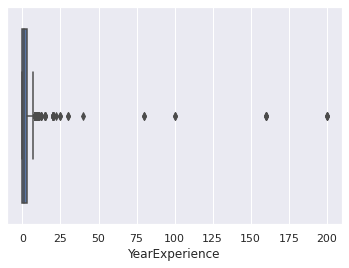

In [52]:
sns.boxplot(x=job_YearExperience['YearExperience'])

In [53]:
job_YearExperience = job_YearExperience.loc[job_YearExperience['YearExperience'] < 10, :]

In [54]:
def visualze(column, data):
  plt.figure(figsize = (20,10))

  plt.subplot(1, 2, 1)
  string_density = 'vẽ biểu đồ density phân phố của ' + column
  plt.title(string_density)
  sns.kdeplot(data[column] , bw = 0.5 , fill = True)
  plt.subplot(1, 2, 2)
  string_box = 'vẽ biểu đồ boxplot của '+ column
  plt.title(string_box)
  sns.boxplot(x=data[column])
  plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


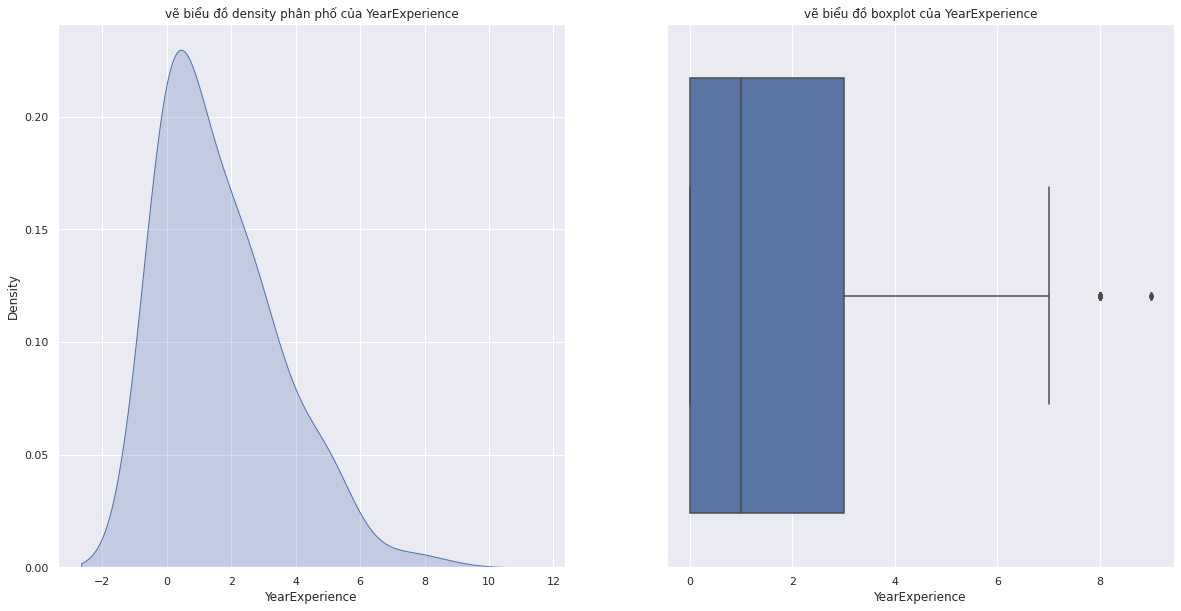

In [55]:
visualze('YearExperience', job_YearExperience)

In [56]:
# Filter values is trend in data job_skill
name_skill = ['metadata', 'sequenc', 'csdl', 'multithr', 'correl', 'refresh', 'tsql',
              'maxim', 'explorat', 'cleans', 'metavers', 'probabl', 'chatbot', 'nlp',
              'classif', 'boost', 'portabl', 'hypothes', 'reinforc', 'uiux', 'maitain'
              ,'metastoc', 'psycholo', 'economet', 'threadha', 'ocr', 'bayesian']

In [57]:
mark = job_skill['Name Skill'].isin(name_skill)

In [58]:
job_skill.drop(job_skill[mark].index, inplace = True)

In [59]:
name_tool = job_tool['Name Tool'].value_counts()[55:].index
mark_tool = job_tool['Name Tool'].isin(name_tool)
job_tool.drop(job_tool[mark_tool].index, inplace = True)

In [60]:
# grammatical normalization of the word
job_skill['Name Skill'] = job_skill['Name Skill'].apply(lambda string: string.replace(string, skill_keywords_dict[string]) if string != None else string, '')
job_tool['Name Tool'] = job_tool['Name Tool'].apply(lambda string: string.replace(string, tool_keywords_dict[string]) if string != None else string, '')
job_level['name level'] = job_level['name level'].apply(lambda string: string.replace(string, level_dict[string]) if (string != None) else string, '')
job_degree['name degree'] = job_degree['name degree'].apply(lambda string: string.replace(string, degree_dict[string]) if ((string != None) & (string != 'undergraduate')) else string, '')

<ipython-input-60-6683a53d4de4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_degree['name degree'] = job_degree['name degree'].apply(lambda string: string.replace(string, degree_dict[string]) if ((string != None) & (string != 'undergraduate')) else string, '')


# Visualization databases

## Title job at Viet Nam

In [61]:
name = job['JobUrl'].value_counts().index
values = job['JobUrl'].value_counts().values

In [62]:
lis = []
for i in values:
  lis.append(i*100/values.sum())

<ipython-input-63-17d570702b1a>:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


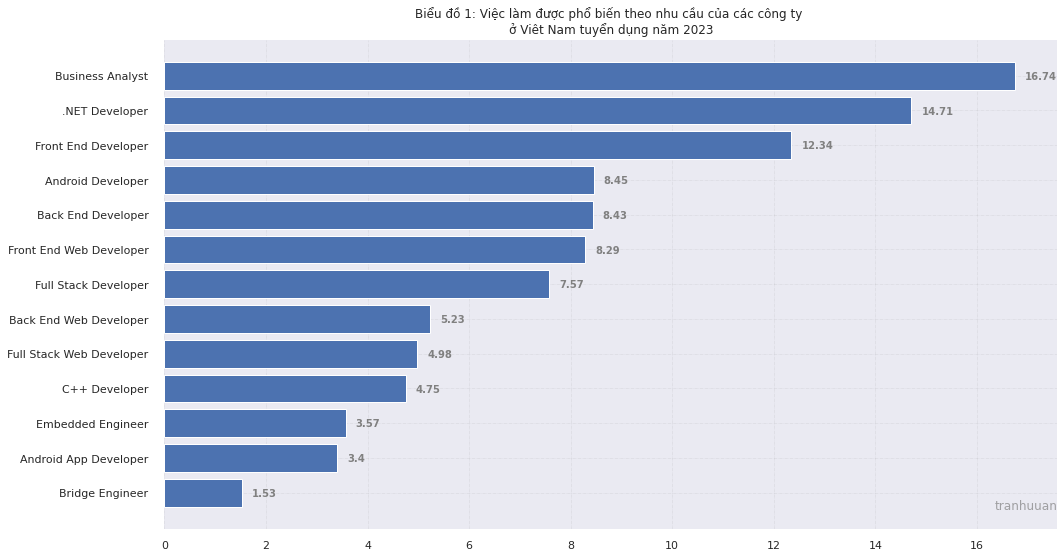

In [63]:
from tkinter.constants import BOTTOM

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, lis)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 1: Việc làm được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

# Top 10 tools in information technology.

In [64]:
tool = ['excel', 'scrum', 'azure',
       'amazon', 'bootstrap', 'microsoft', 'git', 'winform', 'linux',
       'docker', 'oracle', 'simulated', 'wordpress', 'photoshop',
       'mariadb', 'tableau', 'websocket', 'django', 'ubuntu', 'scratch', 'word',
       'unix', 'powerpoint', 'hadoop', 'powerbi']

In [65]:
name = job_tool['Name Tool'].value_counts().index
values = job_tool['Name Tool'].value_counts().values
idx = []
val = []
for i, v in zip(name,values):
  if tool.__contains__(i):
    idx.append(i)
    val.append(v)

lis = []
for i in val:
  lis.append(i*100/sum(val))

<ipython-input-66-f837258f8a2c>:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


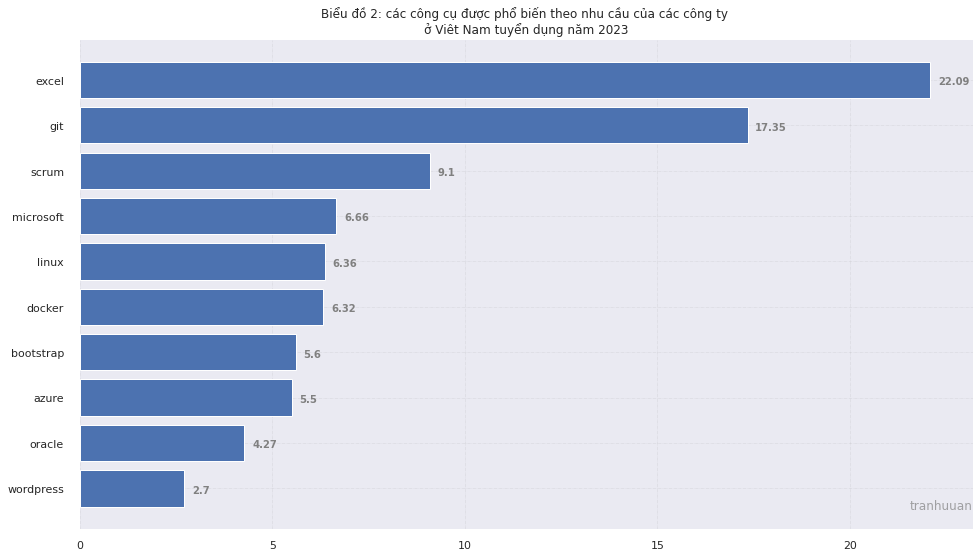

In [66]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(idx[:10], lis[:10])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 2: các công cụ được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

## Top 10 tech using than most.

In [67]:
job_tool['Name Tool'] = job_tool['Name Tool'].str.replace('^js$', 'javascript')

<ipython-input-67-5158f94e792e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  job_tool['Name Tool'] = job_tool['Name Tool'].str.replace('^js$', 'javascript')


In [68]:
tech = ['c', 'nodejs', 'python', 'reactjs', 'angularjs', 'typescript', 'java', 'javascript', 'php', 'c++',
            'nestjs', 'scala', 'matlab', 'flutter']

In [69]:
name = job_tool["Name Tool"].value_counts().index
values = job_tool["Name Tool"].value_counts().values
idx = []
val = []
for i, v in zip(name,values):
  if tech.__contains__(i):
    idx.append(i)
    val.append(v)
lis = []
for i in val:
  lis.append(i*100/sum(val))

<ipython-input-70-39a6939efcaf>:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


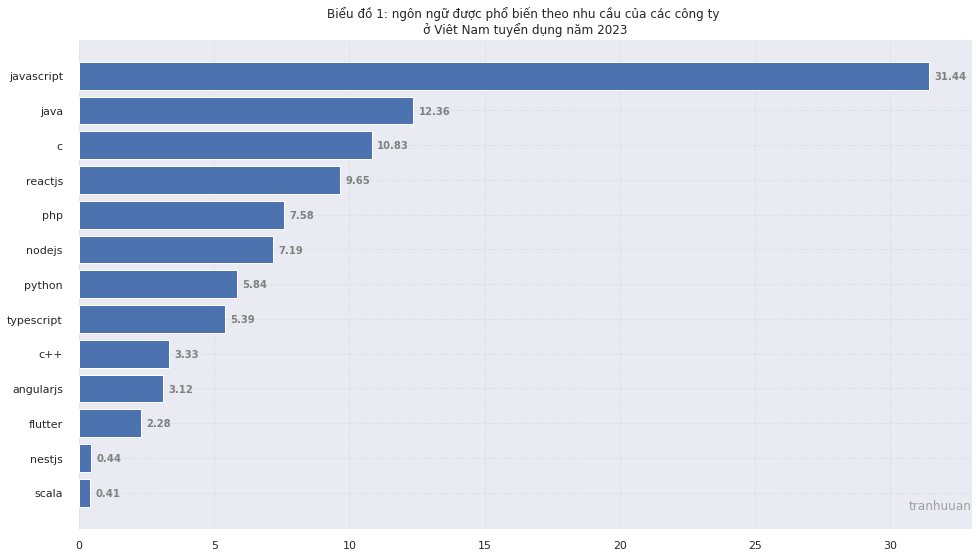

In [70]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(idx[:13], lis[:13])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 1: ngôn ngữ được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

## Soft skill

In [71]:
soft_skill = ['english', 'teamwork', 'research', 'communicated', 'manager', 'organization','mindset', 'creativity', 'adaptability', 'negotiation']

In [72]:
name = job_skill["Name Skill"].value_counts().index
values = job_skill["Name Skill"].value_counts().values
idx = []
val = []
for i, v in zip(name,values):
  if soft_skill.__contains__(i):
    idx.append(i)
    val.append(v)
lis = []
for i in val:
  lis.append(i*100/sum(val))

<ipython-input-73-7c40b0f77ba9>:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


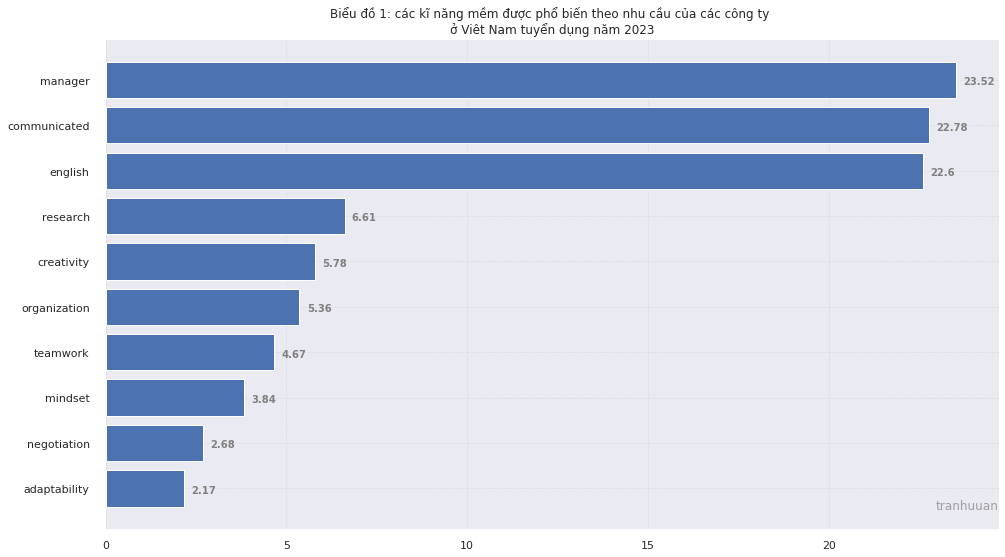

In [73]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(idx[:13], lis[:13])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 1: các kĩ năng mềm được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

## Top 10 Technical skill

In [74]:
technical_skill = [ 'sql', 'design', 'coding', 'analytic',
       'databases', 'test', 'network', 'virtualization']

In [75]:

name = job_skill['Name Skill'].value_counts().index
values = job_skill['Name Skill'].value_counts().values
idx = []
val = []
for i, v in zip(name,values):
  if technical_skill.__contains__(i):
    idx.append(i)
    val.append(v)
lis = []
for i in val:
  lis.append(i*100/sum(val))

<ipython-input-76-6610a2bf6208>:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


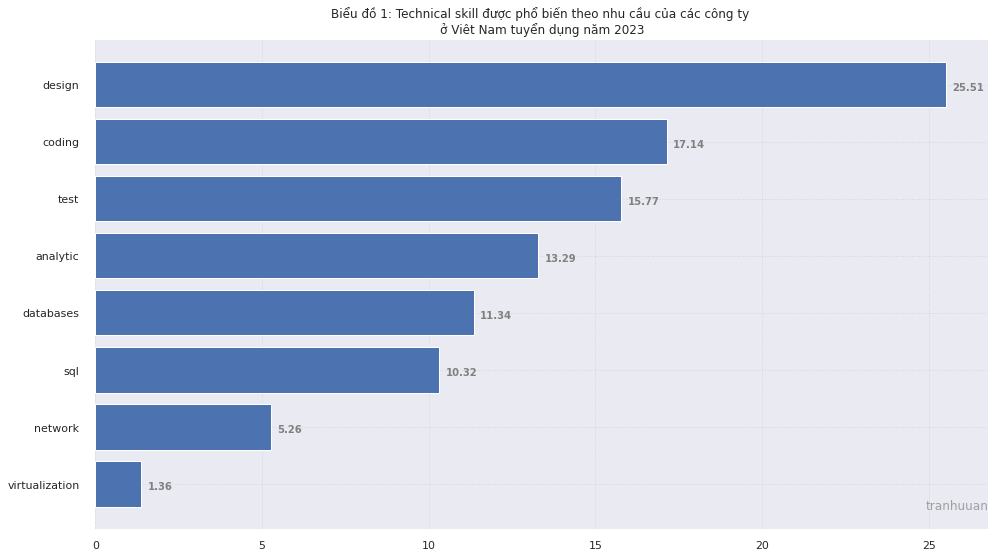

In [76]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(idx[:13], lis[:13])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 1: Technical skill được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

## Percentage degree.

In [77]:
vs_degree = job.merge(job_degree, how='left', left_on='index', right_on='index')


In [78]:
vs_degree = vs_degree[['index', 'name degree']]

In [79]:
vs_degree['y/n degree'] = vs_degree['name degree'].apply(lambda string: 'Yes' if str(string) != 'nan' else 'No', '')

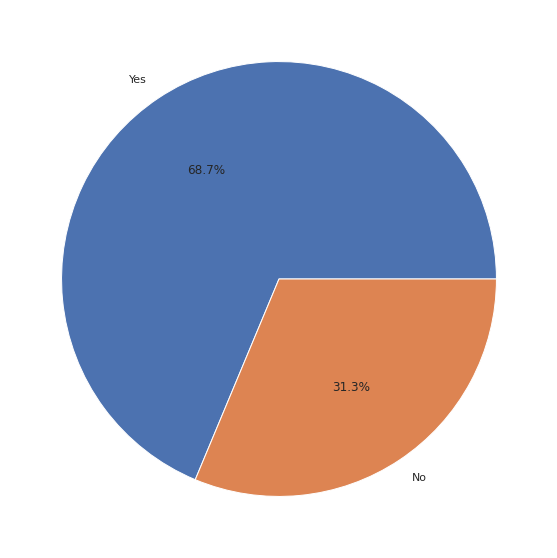

In [80]:
degreeX = vs_degree['y/n degree'].value_counts()
fig = plt.figure(figsize=(20,10))
plt.pie(degreeX.values, labels=degreeX.index, autopct='%1.1f%%',
       )
plt.show()

theo số liệu thống kê ở hình trên. Tỉ lệ mà bài tuyển dụng yêu cầu bằng cấp là 68.7%. Hỏi số liêu này có phù hợp với giả thuyết hay không hay nó sẽ lớn hơn 68.7%?<br>
- H0: p=0.687
- H1: p> 0.687<br>
 ta có tổng số là 5685 trong đó 3906 số lượng yêu cầu bằng cấp<br>
 

In [81]:
vs_degree.loc[vs_degree['y/n degree'] == 'Yes', :].shape

(3906, 3)

In [82]:
print('Tỉ lệ f: ', 3906/5685)

Tỉ lệ f:  0.6870712401055409


In [83]:
((0.687-0.55)*math.sqrt(5685))/math.sqrt(1-0.687)

18.463483086019597

miền bác bỏ H0 sẽ nằm trong (-v  cùng, -1.96) hoặc (1.96, vô cùng)

kết luận: giả thuyết H0 bị bác bỏ.

In [84]:
from statsmodels.stats.proportion import proportions_ztest

In [85]:
#perform one proportion z-test
proportions_ztest(count=0.687, nobs=5685, value=0.55)

(-3771.7734596173214, 0.0)

Với z-statics = 0.0115 và p-value=0.99 => không đủ cơ sở để bác bỏ giả thuyết H0

## Location jobs.

In [86]:
job['Location'].value_counts()

thành phố hồ chí minh    2733
hà nội                   1059
đà nẵng                   200
việt nam                  172
remote                     32
đắk lắk                    24
nha trang                  17
thừa thiên - huế           12
đồng nai                    9
gò vấp                      9
quận 7                      8
bình dương                  7
cần thơ                     5
bắc ninh                    4
khánh hòa                   4
hưng yên                    3
bình định                   3
thủ đức                     3
long an                     2
thuận an                    2
thủ dầu một                 1
long thành                  1
an giang                    1
hòa bình                    1
huế                         1
hạ long                     1
đà lạt                      1
quảng ngãi                  1
hải phòng                   1
hải dương                   1
Name: Location, dtype: int64

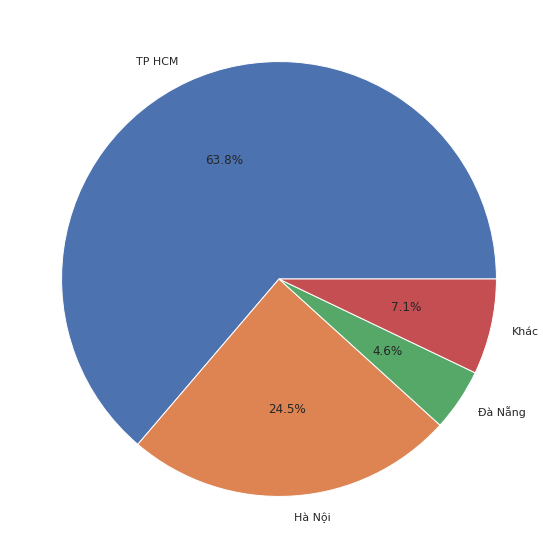

In [87]:
explode = [63.76, 24.52, 4.63, 7.1]
labels = ['TP HCM', 'Hà Nội', 'Đà Nẵng', 'Khác']
fig = plt.figure(figsize=(10,10))
plt.pie(explode, labels=labels, autopct='%1.1f%%',
       )
plt.savefig('chart1_pieChart.png')

## Degree by level.

In [88]:
# visualization data level by degree
data_vs_level = job.merge(job_level, how='left', left_on='index', right_on='index')
data_vs_level = data_vs_level.merge(job_YearExperience, how='left', left_on='index', right_on='index').rename(columns={0:'YearExperience'})
data_vs_level = data_vs_level.merge(job_degree, how='left', left_on='index', right_on='index').rename(columns={0:'degree'})

In [89]:
data_vs_level

,index,JobTitle,Company,Location,Summary,JobUrl,name level,YearExperience,name degree
0,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,manager,0.0,NaN
1,1,Intern / Fresher Developer,DXC Technology,thành phố hồ chí minh,overview : how would you like to join an inter...,.NET Developer,NaN,0.0,graduate
2,2,.NET Developer (Middle/Senior level),SIOUX,đà nẵng,sioux group wa found in 1996 in the netherland...,.NET Developer,NaN,4.0,bachelor
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,đà nẵng,"up to $ 2,200 junior , middl , senior da nang ...",.NET Developer,senior,2.0,master
4,3,Jun/Mid/Senior .NET Developer,Saigon Technology,đà nẵng,"up to $ 2,200 junior , middl , senior da nang ...",.NET Developer,senior,2.0,certificate
...,...,...,...,...,...,...,...,...,...
8077,4376,[HÀ NỘI] SENIOR/ MIDDLE RUBY ON RAILS,Việc Ơi It Client,hà nội,giới thiệu : việc ơi it client là công ty 100 ...,Full Stack Web Developer,leader,2.0,undergraduate
8078,4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,thành phố hồ chí minh,mô tả công việc : ( mức lương : thỏa thuận ) d...,Full Stack Web Developer,senior,3.0,NaN
8079,4378,"Senior Fullstack Engineer (Java, React)",Zühlke,thành phố hồ chí minh,perman full-tim ho chi minh citi softwar engin...,Full Stack Web Developer,senior,5.0,certificate
8080,4378,"Senior Fullstack Engineer (Java, React)",Zühlke,thành phố hồ chí minh,perman full-tim ho chi minh citi softwar engin...,Full Stack Web Developer,senior,5.0,master


In [90]:
data_vs_level['name level'].unique()

array(['manager', nan, 'senior', 'middle', 'junior', 'fresher', 'leader',
       'architect', 'intership'], dtype=object)

In [91]:
indxs = data_vs_level.loc[data_vs_level['name level'].isna() == True, :].index
for indx in indxs:
    if data_vs_level['YearExperience'][indx] == 0:
        data_vs_level['name level'][indx] = 'intership/ fresher'
    elif data_vs_level['YearExperience'][indx] <= 3:
        data_vs_level['name level'][indx] = 'junior'
    else:
        data_vs_level['name level'][indx] = 'senior'

<ipython-input-91-f2cf66d51619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vs_level['name level'][indx] = 'intership/ fresher'
<ipython-input-91-f2cf66d51619>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vs_level['name level'][indx] = 'senior'
<ipython-input-91-f2cf66d51619>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vs_level['name level'][indx] = 'junior'


In [92]:
data_vs_level['name level'] = data_vs_level['name level'].str.replace('^fresher$|^intership$', 'intership/ fresher')

<ipython-input-92-a6f11d5e506e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_vs_level['name level'] = data_vs_level['name level'].str.replace('^fresher$|^intership$', 'intership/ fresher')


In [93]:
data_vs_level['y/n degree'] = data_vs_level['name degree']
data_vs_level['y/n degree'] = data_vs_level['y/n degree'].apply(lambda string: 'Yes' if str(string) != 'nan' else 'No', '')

In [94]:
data_chi = data_vs_level[['y/n degree', 'name level']]

In [95]:
from scipy.stats import chi2_contingency

In [96]:
contigency= pd.crosstab(data_chi['y/n degree'], data_chi['name level'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print (p)

5.933118976707722e-103


In [97]:
data_v = data_vs_level[['y/n degree', 'name level']].groupby(['y/n degree', 'name level']).size().reset_index()

In [98]:
data_v

,y/n degree,name level,0
0,No,architect,71
1,No,intership/ fresher,405
2,No,junior,527
3,No,leader,222
4,No,manager,698
5,No,middle,46
6,No,senior,369
7,Yes,architect,228
8,Yes,intership/ fresher,374
9,Yes,junior,791


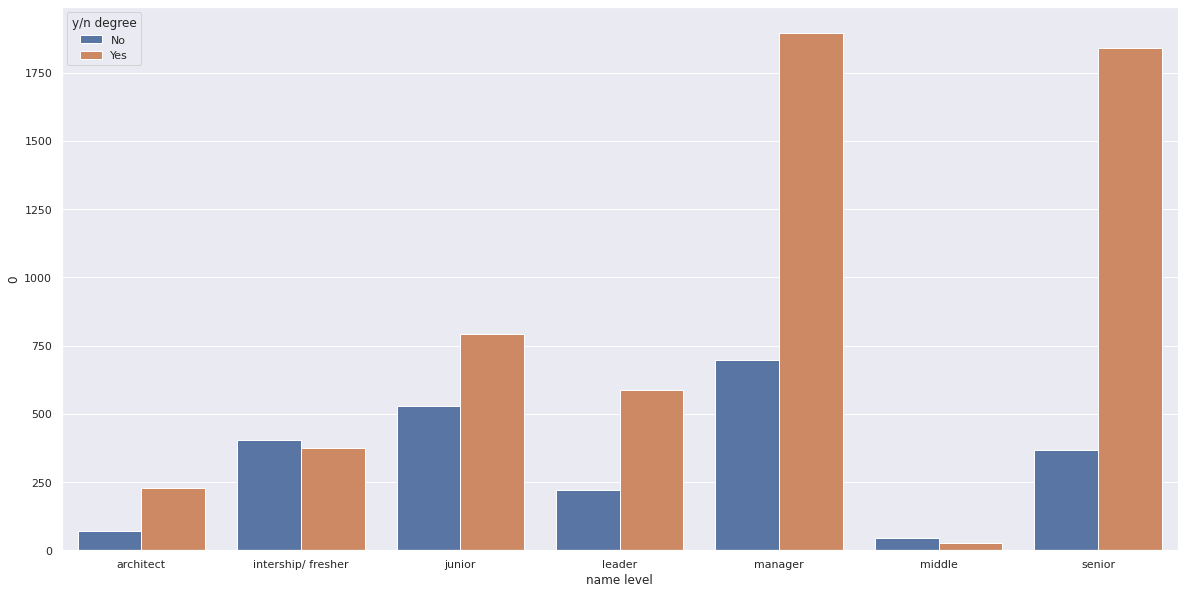

In [99]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x = data_v['name level'], y = data_v[0], hue = data_v['y/n degree'])

plt.show()

## Language by level.

In [100]:
job_level.head()

,index,name level
0,0,manager
1,3,senior
2,3,middle
3,3,junior
4,5,fresher


In [101]:
job_tool.head()

,index,Name Tool
0,0,excel
1,0,sql
2,0,visual
3,0,c
4,0,reactjs


In [102]:
level_by_l =  ['middle', 'junior', 'senior', 'fresher', 'intership']
tech_by_level = ['javascript', 'java', 'php', 'python', 'c', 'c++']
print(tech_by_level)
print(level_by_l)

['javascript', 'java', 'php', 'python', 'c', 'c++']
['middle', 'junior', 'senior', 'fresher', 'intership']


In [103]:
mark_l = job_tool['Name Tool'].isin(tech_by_level)
job_l = job_tool[mark_l]

In [104]:
mark_by_l = job_level['name level'].isin(level_by_l)
job_by_l = job_level[mark_by_l]

In [105]:
job_by_l['name level'] = job_by_l['name level'].str.replace('^intership$', 'intenrship/fresher')
job_by_l['name level'] = job_by_l['name level'].str.replace('^fresher$', 'intenrship/fresher')

<ipython-input-105-011983439b35>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  job_by_l['name level'] = job_by_l['name level'].str.replace('^intership$', 'intenrship/fresher')
<ipython-input-105-011983439b35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_by_l['name level'] = job_by_l['name level'].str.replace('^intership$', 'intenrship/fresher')
<ipython-input-105-011983439b35>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  job_by_l['name level'] = job_by_l['name level'].str.replace('^fresher$', 'intenrship/fresher')
<ipython-input-105-011983439b35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [106]:
job_l.head()

,index,Name Tool
3,0,c
10,2,c
13,3,javascript
23,4,c
25,5,c


In [107]:
data_analyst_level_by_language = job_by_l.merge(job_l, how = 'left', left_on='index', right_on='index')

In [108]:
x = data_analyst_level_by_language.groupby([ 'Name Tool', 'name level'])['name level'].size()

In [109]:
df3 = x.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

In [110]:
x

Name Tool   name level        
c           intenrship/fresher     34
            junior                 62
            middle                  3
            senior                248
c++         intenrship/fresher      5
            junior                 33
            senior                 79
java        intenrship/fresher     22
            junior                 91
            middle                 10
            senior                281
javascript  intenrship/fresher     64
            junior                221
            middle                 10
            senior                606
php         intenrship/fresher     20
            junior                 44
            middle                  1
            senior                157
python      intenrship/fresher     20
            junior                 43
            senior                101
Name: name level, dtype: int64

In [111]:
df3

Name Tool   name level        
c           intenrship/fresher     9.798271
            junior                17.867435
            middle                 0.864553
            senior                71.469741
c++         intenrship/fresher     4.273504
            junior                28.205128
            senior                67.521368
java        intenrship/fresher     5.445545
            junior                22.524752
            middle                 2.475248
            senior                69.554455
javascript  intenrship/fresher     7.103219
            junior                24.528302
            middle                 1.109878
            senior                67.258602
php         intenrship/fresher     9.009009
            junior                19.819820
            middle                 0.450450
            senior                70.720721
python      intenrship/fresher    12.195122
            junior                26.219512
            senior                61.585366
N

In [112]:
data_analyst_level_by_language.head()

,index,name level,Name Tool
0,3,senior,javascript
1,3,middle,javascript
2,3,junior,javascript
3,5,intenrship/fresher,c
4,5,intenrship/fresher,python


In [113]:
contigency= pd.crosstab(data_analyst_level_by_language['name level'], data_analyst_level_by_language['Name Tool'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print (p)

0.005149610211194277


# Model recommend by statistical.

In [114]:
import string

In [115]:
def lables_title(string1):
  strings = string1
  strings = strings.lower()
  strings = strings.replace(strings[strings.find('('): strings.find(')')], '')
  strings = re.sub('senior|junior|fresher|intenr', '', strings)
  strings = strings.translate(str.maketrans('', '', string.punctuation))
  return strings

In [116]:
job['JobTitle_to_fix'] = job['JobTitle'].apply(lambda strings: lables_title(strings))

In [117]:
len(job.loc[job['JobTitle_to_fix'] == 'data analyst', :]['index'].unique())*100/job.shape[0]

0.2779064381658175

In [118]:
idx = job.loc[job['JobTitle_to_fix'] == 'data analyst', 'index'].values

In [119]:
idxs = job_skill['index'].isin(idx)

In [120]:
job_skill.loc[job_skill['index'].isin(idx), :]['Name Skill'].unique()

array(['dashboard', 'support', 'manager', 'analytic', 'report',
       'visualization', 'math', 'sql', 'knowledgeable', 'statistics',
       'recommendations', 'anomaly', 'research', 'databases', 'provides',
       'leader', 'communicated', 'programing', 'segmentation', 'logic',
       'design', 'organization', 'english', 'optimization'], dtype=object)

In [121]:
idx_tool = job.loc[job['JobTitle_to_fix'] == 'data analyst', 'index'].values

In [122]:
idxs = job_tool['index'].isin(idx)

In [123]:
job_tool.loc[job_tool['index'].isin(idx), :]['Name Tool'].unique()

array(['visual', 'sql', 'tableau', 'word', 'excel', 'powerpoint',
       'script', 'scala', 'python', 'snack', 'powerbi', 'serves'],
      dtype=object)

In [124]:
def statistical(nameJob, user_skill, user_tool):
  idx = job.loc[job['JobTitle_to_fix'] == nameJob, 'index'].values
  

  idxs_skill = job_skill['index'].isin(idx)
  idxs_tool = job_tool['index'].isin(idx)

  unique_skill = job_skill.loc[job_skill['index'].isin(idx), :]['Name Skill'].unique()
  unique_tool = job_tool.loc[job_tool['index'].isin(idx), :]['Name Tool'].unique()
  print('Kỹ năng của '+ nameJob + ": ", str(unique_skill))
  print('Công cụ của '+ nameJob + ": ", str(unique_tool))


  per_user_skill = len(user_skill)*100/ len(unique_skill)
  requests_job_skill = 100 - per_user_skill

  per_user_tool = len(user_tool)*100/ len(unique_tool)
  requests_job_tool = 100 - per_user_tool
  # biểu đồ ứng viên có thể đáp ứng được công việc.
  plt.figure(figsize = (20,10))
  plt.subplot(1, 2, 1)
  explode = [per_user_tool, requests_job_tool]
  labels = ['công cụ ứng viên đáp ứng được', 'công cụ công việc yêu cầu']
  
  plt.pie(explode, labels=labels, autopct='%1.1f%%')
  plt.subplot(1, 2, 2)
  explode = [per_user_skill, requests_job_skill]
  labels = ['Kỹ năng ứng viên đáp ứng được', 'Kỹ năng công việc yêu cầu']
  
  plt.pie(explode, labels=labels, autopct='%1.1f%%')
  plt.show()

Kỹ năng của data analyst:  ['dashboard' 'support' 'manager' 'analytic' 'report' 'visualization'
 'math' 'sql' 'knowledgeable' 'statistics' 'recommendations' 'anomaly'
 'research' 'databases' 'provides' 'leader' 'communicated' 'programing'
 'segmentation' 'logic' 'design' 'organization' 'english' 'optimization']
Công cụ của data analyst:  ['visual' 'sql' 'tableau' 'word' 'excel' 'powerpoint' 'script' 'scala'
 'python' 'snack' 'powerbi' 'serves']


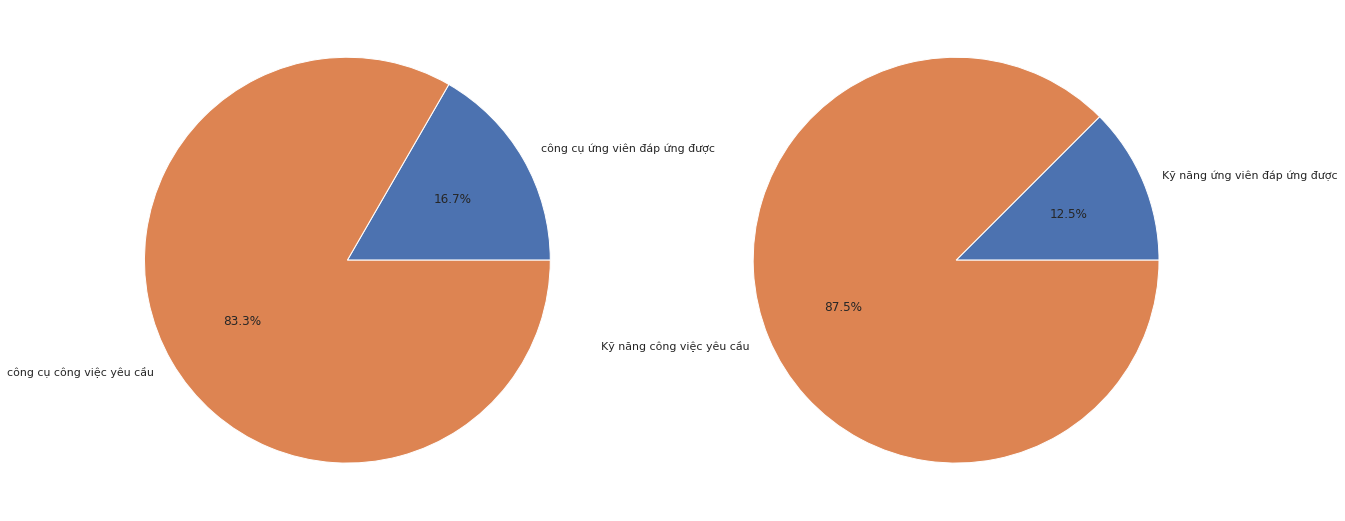

In [125]:
statistical('data analyst', ['python', 'sql', 'spss'], ['design', 'test'])

# Show name job suitable with skills, tools of emplyment.

In [126]:
job_skill.head()

,index,Name Skill
0,0,provides
1,0,manager
2,0,design
3,0,cleaning
4,0,coding


In [127]:
job_tool.head()

,index,Name Tool
0,0,excel
1,0,sql
2,0,visual
3,0,c
4,0,reactjs


In [128]:
job.head()

,index,JobTitle,Company,Location,Summary,JobUrl,JobTitle_to_fix
0,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,net developer
13,1,Intern / Fresher Developer,DXC Technology,thành phố hồ chí minh,overview : how would you like to join an inter...,.NET Developer,intern developer
27,2,.NET Developer (Middle/Senior level),SIOUX,đà nẵng,sioux group wa found in 1996 in the netherland...,.NET Developer,net developer
56,3,Jun/Mid/Senior .NET Developer,Saigon Technology,đà nẵng,"up to $ 2,200 junior , middl , senior da nang ...",.NET Developer,junmid net developer
75,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,đà nẵng,"web develop ( .net , asp.net , c # ) npv corp ...",.NET Developer,web developer


In [129]:
st_job_tool = job_tool.loc[job_tool['Name Tool'].isin(['c', 'javascript']), :]['index'].unique()
st_job_skill = job_skill.loc[job_skill['Name Skill'].isin(['design', 'test', 'communicated']), :]['index'].unique()

In [130]:
print(st_job_skill[:10])
print(st_job_tool[:10])


[ 0  1  2  3  5  7  8 10 11 14]
[ 0  2  3  4  5  6  7  8 10 11]


In [131]:
values_job = job.loc[(job['index'].isin(st_job_skill)) & (job['index'].isin(st_job_tool)), :]['JobUrl'].value_counts()

In [132]:
name = values_job.index
values = values_job.values
idx = []
val = []
for i, v in zip(name,values):
    idx.append(i)
    val.append(v*100/sum(values))

In [133]:
sum(values)

346

In [146]:
def show_job_suitable(user_skill, user_tool):
  # get index  the tools and skills of the user.
  st_job_tool = job_tool.loc[job_tool['Name Tool'].isin(['c', 'javascript']), :]['index'].unique()
  st_job_skill = job_skill.loc[job_skill['Name Skill'].isin(['design', 'test', 'communicated']), :]['index'].unique()
  # get the job by the tools of user and skills of the user.
  values_job = job.loc[(job['index'].isin(st_job_skill)) & (job['index'].isin(st_job_tool)), :]['JobUrl'].value_counts()
  # calulator percentage.
  name = values_job.index
  values = values_job.values
  idx = []
  val = []
  for i, v in zip(name,values):
      idx.append(i)
      val.append(v*100/sum(values))
  # Figure Size
  fig, ax = plt.subplots(figsize =(16, 9))
  
  # Horizontal Bar Plot
  ax.barh(idx, val)
  
  # Remove axes splines
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)
  
  # Remove x, y Ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  
  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 10)
  
  # Add x, y gridlines
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)
  
  # Show top values
  ax.invert_yaxis()
  
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5,
              str(round((i.get_width()), 2)),
              fontsize = 10, fontweight ='bold',
              color ='grey')
  
  
  
  # Add Text watermark
  fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
          color ='grey', ha ='right', va ='bottom',
          alpha = 0.7)
  # Show Plot
  plt.show()

<ipython-input-146-6cdb42afe5e7>:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


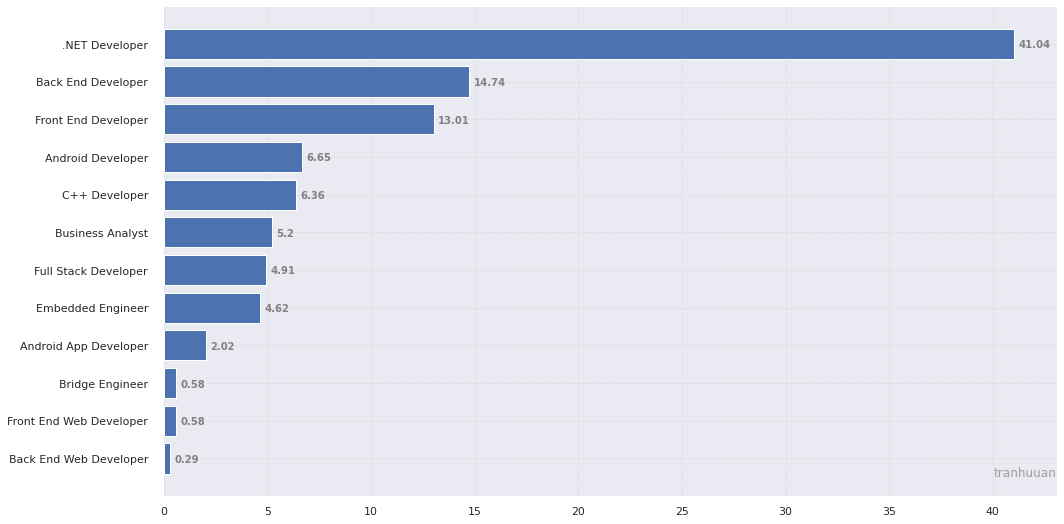

In [147]:
show_job_suitable(['c', 'javascript'], ['design', 'test'])